In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA

In [2]:
# Import the pandas library
import pandas as pd  

# Read the CSV file named "smcs.csv" into a DataFrame
df = pd.read_csv("smcs.csv")  

# Display the first five rows of the DataFrame
df.head()  

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
# Check for missing (null) values in each column of the DataFrame
# Sum up the number of missing values per column
df.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [4]:
# Drop the "Customer ID" column from the DataFrame
# The 'inplace=True' parameter modifies the DataFrame directly without returning a new one
df.drop(columns="Customer ID", inplace=True)

# Display the first five rows of the updated DataFrame
df.head()

,Age,Gender,Annual Income,Spending Score
0,30,Male,151479,89
1,58,Female,185088,95
2,62,Female,70912,76
3,23,Male,55460,57
4,24,Male,153752,76


In [5]:
# Generate summary statistics for the numerical columns in the DataFrame
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [6]:
# Display information about the DataFrame, including the number of non-null values,
# data types of each column, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15079 non-null  int64 
 1   Gender          15079 non-null  object
 2   Annual Income   15079 non-null  int64 
 3   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 471.3+ KB


<Figure size 600x400 with 0 Axes>

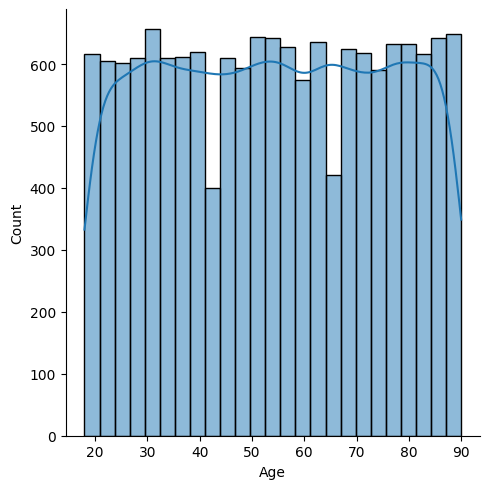

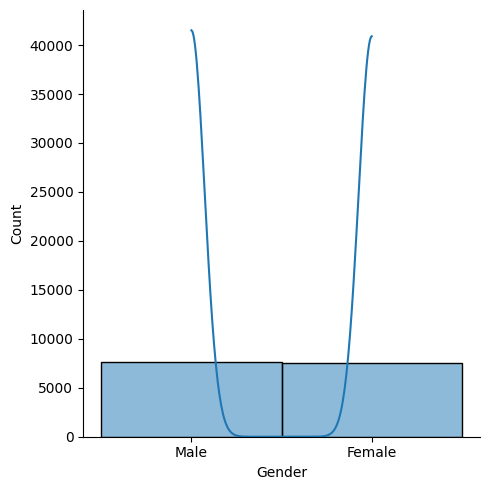

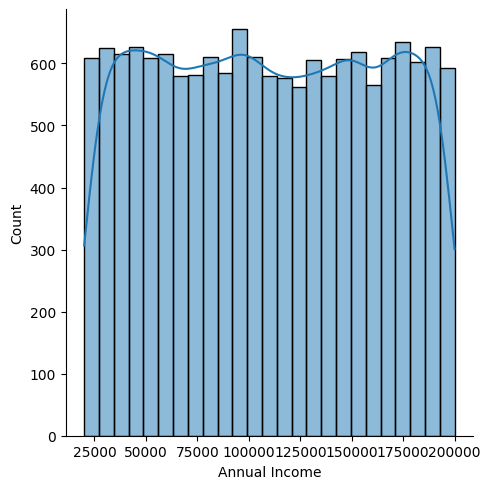

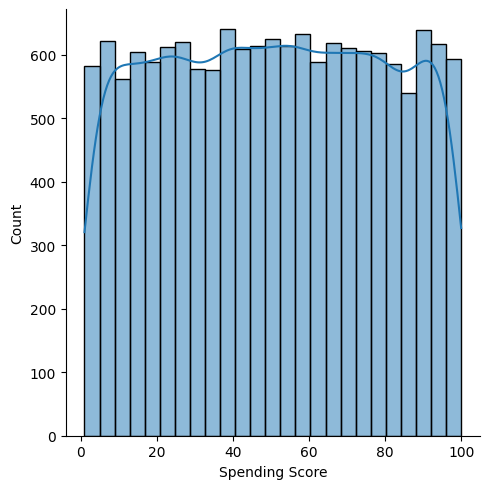

In [7]:
##checking destribution of the datas
plt.figure(figsize=(6, 4))
for i in ["Age","Gender","Annual Income","Spending Score"]:

    sns.displot(data=df,x=i,kde=True)
    plt.show()

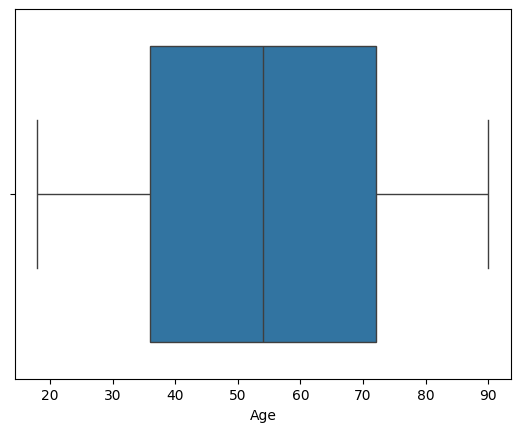

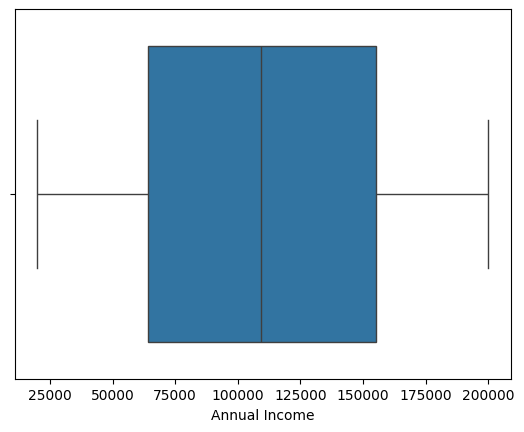

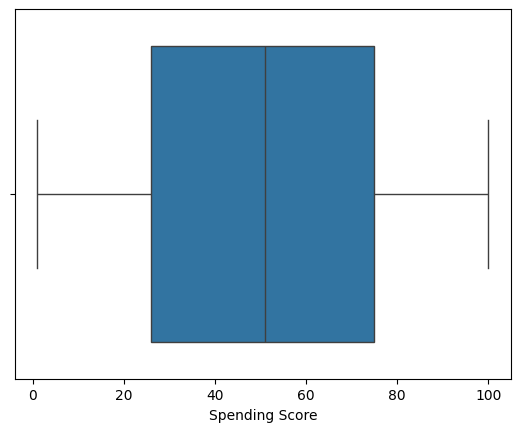

In [8]:
##checking outliers
for i in df.select_dtypes(include="integer").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [9]:
# Encode categorical variables
if 'Gender' in df.columns:
    df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

In [10]:
#Scaling the dataset without selecting Gender column

gen_col = df.iloc[:, 1]  # Extracting column at index 1

# Selecting columns to scale
columns_to_scale = df.drop(df.columns[1], axis=1)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_to_scale)

# Convert back to DataFrame
scaled_data1 = pd.DataFrame(scaled_data, columns=columns_to_scale.columns)

# Insert the excluded column back in its original position
scaled_data1.insert(1, df.columns[1], gen_col)


In [11]:
# Apply PCA to reduce dimensions to 2
n_components = 2
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(scaled_data1)

IMPLEMENTING K-MEANS CLUSTER ALGORITHM

Calculating WCSS for different values of k...



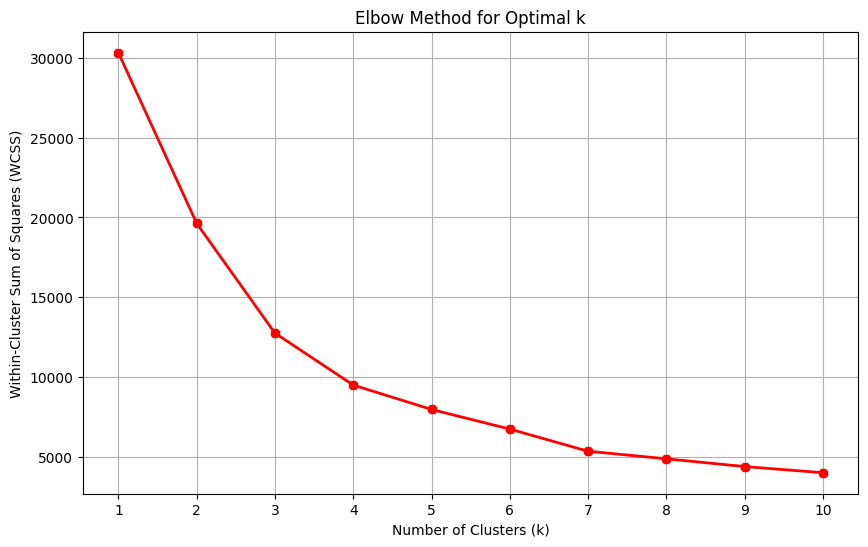


Elbow point is where the WCSS curve starts to bend significantly.


In [12]:
#Manualy finding the number of clusters using elbow method

wcss = []  # List to store WCSS values

print("Calculating WCSS for different values of k...\n")

# Loop through different k values (number of clusters)
for k in range(1, 11):
    # Initialize KMeans with current k
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)

    # Fit the model to the data
    kmeans.fit(pca_transformed)

    # Append the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

# Plot WCSS values for visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("\nElbow point is where the WCSS curve starts to bend significantly.")


In [13]:
#Though manually finding the cluster is little confusing
#Calculate optimal number of clusters using silhouette score

# Initialize variables to track the best k and silhouette score
best_k = 2
best_score = -1

print("Finding the optimal number of clusters using silhouette score...\n")

# Loop through different values of k (number of clusters)
for k in range(2, 11):
    print(f"Testing k = {k}...")

    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=500, n_init='auto', random_state=42)

    # Fit the model and predict cluster labels
    labels = kmeans.fit_predict(pca_transformed)

    # Calculate the silhouette score
    score = silhouette_score(pca_transformed, labels)
    print(f"Silhouette Score for k = {k}: {score:.4f}")

    # Update best k if the current score is higher
    if score > best_score:
        best_k = k
        best_score = score
        print(f"New best k found: {best_k} with silhouette score: {best_score:.4f}\n")

print(f"\n\nOptimal number of clusters: {best_k}")


Finding the optimal number of clusters using silhouette score...

Testing k = 2...
Silhouette Score for k = 2: 0.3346
New best k found: 2 with silhouette score: 0.3346

Testing k = 3...
Silhouette Score for k = 3: 0.3528
New best k found: 3 with silhouette score: 0.3528

Testing k = 4...
Silhouette Score for k = 4: 0.3404
Testing k = 5...
Silhouette Score for k = 5: 0.3216
Testing k = 6...
Silhouette Score for k = 6: 0.3161
Testing k = 7...
Silhouette Score for k = 7: 0.3541
New best k found: 7 with silhouette score: 0.3541

Testing k = 8...
Silhouette Score for k = 8: 0.3380
Testing k = 9...
Silhouette Score for k = 9: 0.3379
Testing k = 10...
Silhouette Score for k = 10: 0.3282


Optimal number of clusters: 7


In [14]:
# Set the number of clusters
num_clusters = 7

# Initialize K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model and predict cluster labels
labels = kmeans.fit_predict(pca_transformed)

# Print the assigned cluster labels for each data point
print("Cluster labels assigned to each data point:\n", labels)


Cluster labels assigned to each data point:
 [4 4 6 ... 2 0 0]


In [15]:
# Print the cluster centers
print(kmeans.cluster_centers_)

[[-0.21946993 -1.35781923]
 [ 0.27044656  1.32872001]
 [-1.37051944 -0.54507669]
 [ 1.10249313 -0.96635462]
 [-1.10460927  0.98830584]
 [ 1.35467753  0.52524274]
 [-0.02930907 -0.00893704]]


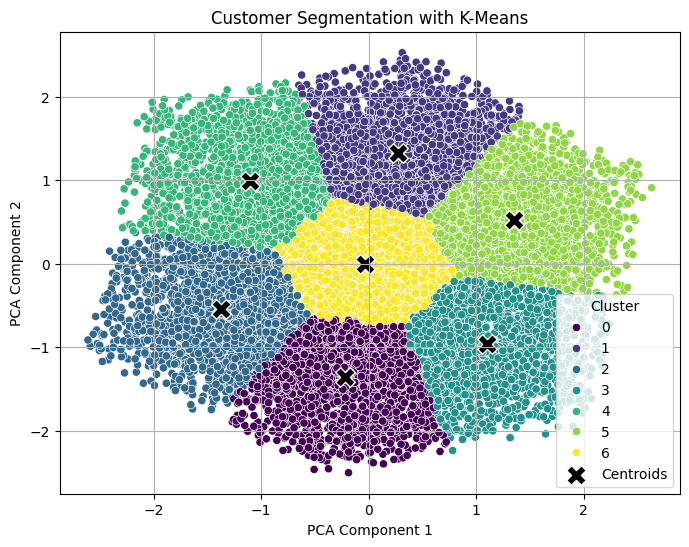

In [16]:
# Set the figure size for better visualization
plt.figure(figsize=(8, 6))

# Create a scatter plot of the PCA-transformed data
# The color of each point is determined by its assigned cluster label from K-Means
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1],
                hue=kmeans.labels_, palette="viridis")

# Plot the cluster centroids as black 'X' markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='X', s=200, edgecolors='white', label="Centroids")

# Label the axes to indicate the principal components
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Add a title to describe the plot
plt.title("Customer Segmentation with K-Means")

# Display the legend to show cluster assignments
plt.legend(title="Cluster")

# Enable the grid for better readability
plt.grid(True)

# Show the final plot
plt.show()

In [17]:
# Define number of clusters
n_clusters = 7

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clust = kmeans.fit(pca_transformed)

# Get cluster labels
cl = clust.labels_

# Calculate silhouette score
sil_score = silhouette_score(pca_transformed, cl)
print(f"Silhouette Score: {sil_score:.4f}")

# Calculate Davies-Bouldin index
dbi_kmeans = davies_bouldin_score(pca_transformed, cl)
print(f"Davies-Bouldin Index: {dbi_kmeans:.4f}")

#Calculate Calinski_harabasz score
ch_score = calinski_harabasz_score(pca_transformed, cl)
print(f"Calinski-Harabasz Score: {ch_score}")

# Interpretation hints
print("\nHigher Silhouette Score (~1) means well-separated clusters.")
print("Lower Davies-Bouldin Index (~0) means better clustering.")
print("Higher Calinski-Harabasz Score means better clusters.")


Silhouette Score: 0.3541
Davies-Bouldin Index: 0.8021
Calinski-Harabasz Score: 11729.247329041164

Higher Silhouette Score (~1) means well-separated clusters.
Lower Davies-Bouldin Index (~0) means better clustering.
Higher Calinski-Harabasz Score means better clusters.


In [18]:

def check_cluster_stability(pca_transformed, n_clusters=7, runs=10):
    labels_list = []  # List to store cluster labels from each run
    
    for _ in range(runs):
        kmeans = KMeans(n_clusters=n_clusters, random_state=np.random.randint(1000), n_init=10)  # Initialize K-Means with random state
        labels_list.append(kmeans.fit_predict(pca_transformed))  # Fit and store labels
    
    # Use Adjusted Rand Index (ARI) to measure stability by comparing first run with others
    stability_score = np.mean([adjusted_rand_score(labels_list[0], labels_list[i]) for i in range(1, runs)])
    
    return stability_score  # Return the average ARI score

# Ensure df is PCA-transformed before passing it to the function
stability_score = check_cluster_stability(pca_transformed, n_clusters=4)
print("Cluster Stability Score:", stability_score)  # Print stability score (closer to 1 = more stable)


Cluster Stability Score: 0.9459482471488249


IMPLEMENTING DBSCAN CLUSTER ALGORITHM

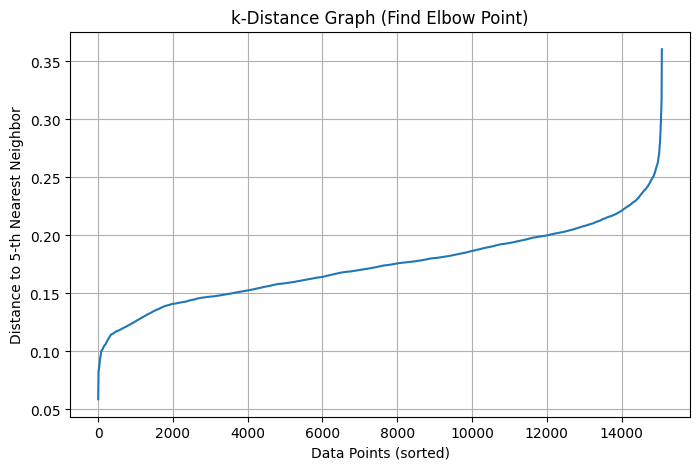

In [19]:
from sklearn.neighbors import NearestNeighbors

# Compute k-nearest neighbors distances
k = 5  # Typically, k = min_samples
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(scaled_data1)
distances, indices = nbrs.kneighbors(scaled_data1)

# Sort distances and plot
sorted_distances = np.sort(distances[:, -1])  # Take k-th nearest neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel("Data Points (sorted)")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.title("k-Distance Graph (Find Elbow Point)")
plt.grid()
plt.show()

In [20]:
eps_values = np.arange(0.06, 0.1, 0.002)  # Try different values of eps
min_samples= 5  # Try value of min_samples
best_silhouette = -1  # Start with the worst possible score
best_eps = None
best_min_samples = None

In [21]:
# Grid search over eps and min_samples
for eps in eps_values:
      db = DBSCAN(eps=eps, min_samples=min_samples, algorithm= "auto").fit(scaled_data1)
      labels = db.fit_predict(scaled_data1)
      # DBSCAN can assign -1 for noise points, so check if clusters are formed
      if len(set(labels)) > 1:  # If at least 1 cluster is formed
          sil_score = silhouette_score(scaled_data1, labels)
          if sil_score > best_silhouette:
              best_silhouette = sil_score
              best_eps = eps
              best_min_samples = min_samples
          print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {sil_score}")

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette}")

eps: 0.06, min_samples: 5, Silhouette Score: -0.084876807771478
eps: 0.062, min_samples: 5, Silhouette Score: -0.08642981378826116
eps: 0.064, min_samples: 5, Silhouette Score: -0.08642981378826116
eps: 0.066, min_samples: 5, Silhouette Score: -0.08642981378826116
eps: 0.068, min_samples: 5, Silhouette Score: -0.08642981378826116
eps: 0.07, min_samples: 5, Silhouette Score: -0.17230814315033313
eps: 0.07200000000000001, min_samples: 5, Silhouette Score: -0.3149124365730846
eps: 0.07400000000000001, min_samples: 5, Silhouette Score: -0.3149124365730846
eps: 0.07600000000000001, min_samples: 5, Silhouette Score: -0.35266866219821064
eps: 0.07800000000000001, min_samples: 5, Silhouette Score: -0.37114601572142425
eps: 0.08000000000000002, min_samples: 5, Silhouette Score: -0.3939843470791488
eps: 0.08200000000000002, min_samples: 5, Silhouette Score: -0.39742157304187276
eps: 0.08400000000000002, min_samples: 5, Silhouette Score: -0.49132119568750227
eps: 0.08600000000000002, min_samples:

C:\Users\BIBEK CHOWDHURY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\BIBEK CHOWDHURY\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


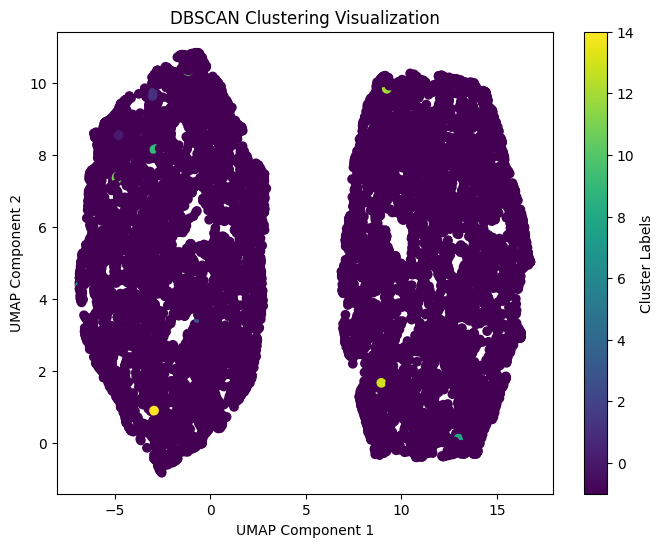

In [22]:
# Create DBSCAN instance with the best parameters
import umap  # Import UMAP for dimensionality reduction
dbscan = DBSCAN(eps=0.086, min_samples=5)  # Initialize DBSCAN with tuned parameters

# Fit and predict cluster labels using DBSCAN
labels = dbscan.fit_predict(scaled_data1)  # Apply DBSCAN clustering on scaled data

# Apply UMAP for dimensionality reduction (2D representation)
umap_model = umap.UMAP(n_components=2, random_state=42)  # Initialize UMAP with 2 components
umap_data = umap_model.fit_transform(scaled_data1)  # Transform data using UMAP

# Visualize the clusters
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=labels, cmap='viridis')  # Scatter plot of UMAP-reduced data colored by clusters
plt.title("DBSCAN Clustering Visualization")  # Set plot title
plt.xlabel("UMAP Component 1")  # Label x-axis (previously misnamed as PCA)
plt.ylabel("UMAP Component 2")  # Label y-axis (previously misnamed as PCA)
plt.colorbar(label="Cluster Labels")  # Add colorbar to indicate cluster assignments
plt.show()  # Display the plot


In [23]:
# Calculate and print the metrics
sil_score = silhouette_score(scaled_data1, labels)
print(f"Silhouette Score: {sil_score:.4f}")

dbi_score = davies_bouldin_score(scaled_data1, labels)
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

# Interpretation:
print("\nHigher Silhouette Score (~1) means well-separated clusters.")
print("Lower Davies-Bouldin Index (~0) means better clustering.")


Silhouette Score: -0.5494
Davies-Bouldin Index: 1.1211

Higher Silhouette Score (~1) means well-separated clusters.
Lower Davies-Bouldin Index (~0) means better clustering.


IMPLEMENTING GAUSSIAN MIXTURE MODEL ALGORITHM

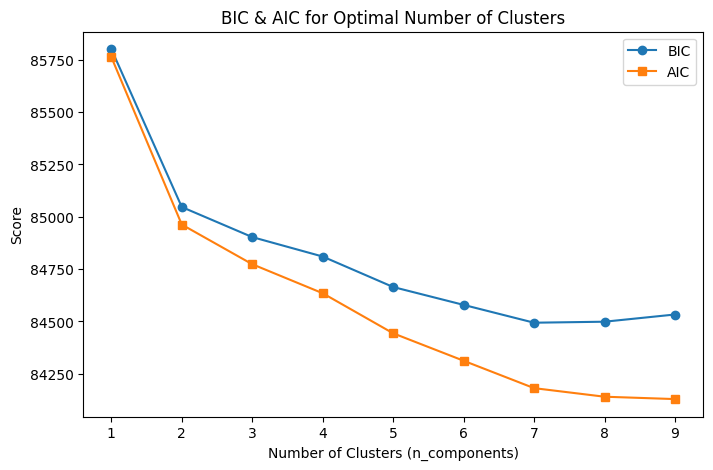

In [24]:
# Try different cluster numbers
n_components_range = range(1, 10)  # Test 1 to 10 clusters
bics, aics = [], []  # Lists to store BIC & AIC scores for each cluster count

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type="full", random_state=42)  # Initialize GMM with n clusters
    gmm.fit(pca_transformed)  # Fit the model on PCA-transformed data
    bics.append(gmm.bic(pca_transformed))  # Compute & store Bayesian Information Criterion (BIC)
    aics.append(gmm.aic(pca_transformed))  # Compute & store Akaike Information Criterion (AIC)

# Step 3: Plot BIC & AIC Scores to determine the optimal number of clusters
plt.figure(figsize=(8, 5))  # Set figure size for better visualization
plt.plot(n_components_range, bics, label="BIC", marker="o")  # Plot BIC values
plt.plot(n_components_range, aics, label="AIC", marker="s")  # Plot AIC values
plt.xlabel("Number of Clusters (n_components)")  # Label x-axis
plt.ylabel("Score")  # Label y-axis
plt.legend()  # Add legend to differentiate BIC & AIC
plt.title("BIC & AIC for Optimal Number of Clusters")  # Set title of the plot
plt.show()  # Display the plot

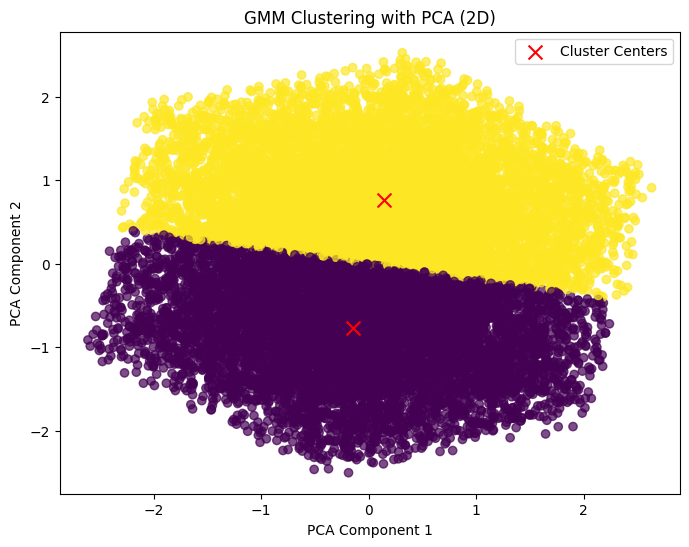

In [25]:
# Fit GMM with optimal n_components
n_clusters = 2  # Change based on BIC/AIC optimization
gmm = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=42)  # Initialize GMM with chosen clusters
labels = gmm.fit_predict(pca_transformed)  # Fit GMM and predict cluster labels for each data point

# Step 4: Visualize the Clusters
plt.figure(figsize=(8,6))  # Set figure size for better visualization
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels, cmap="viridis", alpha=0.7)  # Scatter plot of PCA-reduced data colored by cluster labels
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label="Cluster Centers")  # Mark cluster centers in red
plt.title("GMM Clustering with PCA (2D)")  # Set plot title
plt.xlabel("PCA Component 1")  # Label x-axis
plt.ylabel("PCA Component 2")  # Label y-axis
plt.legend()  # Add legend for cluster centers
plt.show()  # Display the plot

In [26]:
# Run GMM multiple times to check clustering stability
gmm_labels_list = []  # List to store cluster labels from each run

for _ in range(10):  # Run GMM 10 times with different random states
    gmm = GaussianMixture(n_components=n_clusters, random_state=np.random.randint(0, 1000))  # Random state for variability
    labels = gmm.fit_predict(pca_transformed)  # Fit GMM and predict cluster labels
    gmm_labels_list.append(labels)  # Store labels from each run

# Compare cluster assignments across multiple runs
from scipy.stats import mode  # Import mode function to find the most common label per point

stability_matrix = np.array(gmm_labels_list)  # Convert list to NumPy array for easier processing
majority_labels, counts = mode(stability_matrix, axis=0)  # Find the most frequent label for each data point
stability_score = np.mean(counts / stability_matrix.shape[0])  # Compute stability score (proportion of agreement)

# Print stability score (closer to 1 means clusters are stable across runs)
print(f"Cluster Stability Score: {stability_score:.4f}")

Cluster Stability Score: 0.5978


In [27]:
# Calculate and print the metrics
sil_score = silhouette_score(pca_transformed, labels)
print(f"Silhouette Score: {sil_score:.4f}")

print("\nHigher Silhouette Score (~1) means well-separated clusters.")

Silhouette Score: 0.3346

Higher Silhouette Score (~1) means well-separated clusters.
